In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.bottom'] = False
matplotlib.rcParams['ytick.left'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['font.family'] = 'NewComputerModern10'
matplotlib.rcParams['font.size'] = 11

In [2]:
pd.read_excel?

In [6]:
tdf = pd.read_csv('Regressions Final Trade Data.csv')

In [7]:
tdf.head()

,major_country,minor_country,code,year,country_o,iso3_o,dynamic_code_o,country_d,iso3_d,dynamic_code_d,...,industry_d,agriculture_d,manufacturing_d,services_d,sector_diff,ln_distance,ln_prod_of_gdps,ln_prod_of_gdp_capitas,ln_trade,trade_agreement
0,BRA,ABW,2000BRAABW,2000,Aruba,ABW,ABW,Brazil,BRA,BRA,...,23.006619,4.750460,13.134660,58.251861,30.126903,8.385337,48.559592,18.163496,17.300138,0
1,BRA,ABW,2001BRAABW,2001,Aruba,ABW,ABW,Brazil,BRA,BRA,...,22.639528,4.801043,13.089538,57.713692,32.937094,8.385337,48.425730,17.993706,17.349382,0
2,BRA,ABW,2002BRAABW,2002,Aruba,ABW,ABW,Brazil,BRA,BRA,...,22.495328,5.475275,12.356963,57.348145,32.911254,8.385337,48.340317,17.872875,17.452437,0
3,BRA,ABW,2003BRAABW,2003,Aruba,ABW,ABW,Brazil,BRA,BRA,...,23.083818,6.167184,14.450765,56.357828,34.587721,8.385337,48.475170,17.974059,18.091171,0
4,BRA,ABW,2004BRAABW,2004,Aruba,ABW,ABW,Brazil,BRA,BRA,...,24.306623,5.665312,15.099530,54.920471,35.787936,8.385337,48.754114,18.223417,19.460811,0


In [47]:
tdf.dtypes.head(60)

major_country                  object
minor_country                  object
code                           object
year                            int64
country_o                      object
iso3_o                         object
dynamic_code_o                 object
country_d                      object
iso3_d                         object
dynamic_code_d                 object
colony_of_destination_ever      int64
colony_of_origin_ever           int64
colony_ever                     int64
common_colonizer                int64
common_legal_origin             int64
contiguity                      int64
distance                      float64
member_gatt_o                   int64
member_wto_o                    int64
member_eu_o                     int64
member_gatt_d                   int64
member_wto_d                    int64
member_eu_d                     int64
member_gatt_joint               int64
member_wto_joint                int64
member_eu_joint                 int64
lat_o       

In [17]:
tdf['sector_diff_distance'] = ((tdf['industry_d'] - tdf['industry_o'])**2 + (tdf['agriculture_d'] - tdf['agriculture_o'])**2 + (tdf['manufacturing_d'] - tdf['manufacturing_o'])**2 + (tdf['services_d'] - tdf['services_o'])**2 )**(1/2)

In [25]:
display(pd.DataFrame(tdf['sector_diff_distance'].describe()))
display(pd.DataFrame(tdf['sector_diff'].describe()))

,sector_diff_distance
count,16154.000000
mean,25.059256
std,14.588910
min,0.666599
25%,13.568104
50%,22.638663
75%,33.797735
max,98.898388


,sector_diff
count,16154.000000
mean,42.817841
std,24.871682
min,1.249231
25%,22.841859
50%,38.932378
75%,58.531334
max,173.956153


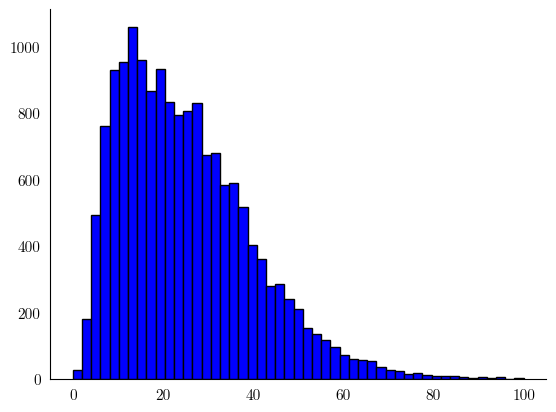

In [35]:
plt.hist(tdf['sector_diff_distance'], color='blue', edgecolor='black', bins=np.linspace(0,100,50))
plt.show()

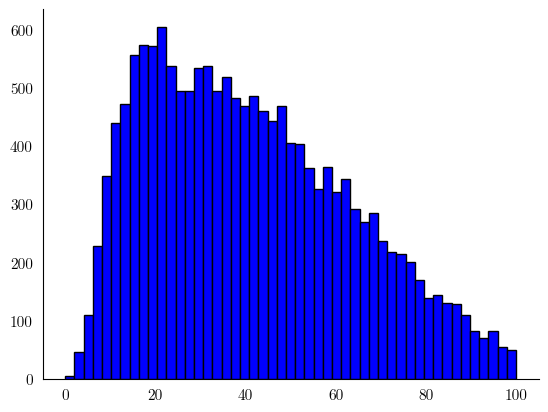

In [36]:
plt.hist(tdf['sector_diff'], color='blue', edgecolor='black', bins=np.linspace(0,100,50))
plt.show()

In [45]:
mod1 = smf.ols('ln_trade ~ sector_diff + ln_prod_of_gdps + ln_distance', data=tdf)
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_trade   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 1.709e+04
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:13:00   Log-Likelihood:                -28937.
No. Observations:               16154   AIC:                         5.788e+04
Df Residuals:                   16150   BIC:                         5.791e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -20.3625      0.286    -71.114      0.000     -20.924     -19.801
sector_diff         0.0009      0.000      1.952      0.051   -3.77e-06       0.002
ln_prod_of_gdps     0.9299      0.004    210.894      0.000       0.921       0.939
ln_distance        -1.0152      0.017    -59.425      0.000      -1.049      -0.982
==============================================================================
Omnibus:                     1196.171   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6630.937
Skew:                           0.040   Prob(JB):                         0.00
Kurtosis:                       6.138   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
mod2 = smf.ols('ln_trade ~ sector_diff + ln_prod_of_gdps + ln_prod_of_gdp_capitas + ln_distance', data=tdf)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_trade   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:22:39   Log-Likelihood:                -28883.
No. Observations:               16154   AIC:                         5.778e+04
Df Residuals:                   16149   BIC:                         5.781e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -20.5094      0.286    -71.777      0.000     -21.070     -19.949
sector_diff             2.462e-05      0.000      0.052      0.959      -0.001       0.001
ln_prod_of_gdps            0.9592      0.005    183.913      0.000       0.949       0.969
ln_prod_of_gdp_capitas    -0.0679      0.007    -10.413      0.000      -0.081      -0.055
ln_distance               -1.0313      0.017    -60.319      0.000      -1.065      -0.998
==============================================================================
Omnibus:                     1256.555   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7251.434
Skew:                           0.074   Prob(JB):                         0.00
Kurtosis:                       6.279   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
mod3 = smf.ols('ln_trade ~ sector_diff + ln_prod_of_gdps + ln_prod_of_gdp_capitas + ln_distance + common_language + trade_agreement + major_country + minor_country + common_legal_origin', data=tdf)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_trade   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     539.9
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:25:19   Log-Likelihood:                -24984.
No. Observations:               16154   AIC:                         5.031e+04
Df Residuals:                   15981   BIC:                         5.164e+04
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -6.5935      3.522     -1.872      0.061     -13.497       0.310
major_country[T.CHN]       1.6801      0.255      6.586      0.000       1.180       2.180
major_country[T.DEU]       0.6861      0.139      4.947      0.000       0.414       0.958
major_country[T.GBR]       0.3005      0.172      1.747      0.081      -0.037       0.638
major_country[T.IND]       0.2699      0.260      1.037      0.300      -0.240       0.780
major_country[T.JPN]       0.6891      0.090      7.650      0.000       0.513       0.866
major_country[T.USA]       0.9855      0.055     18.050      0.000       0.878       1.093
major_country[T.ZAF]       0.0064      0.167      0.038      0.970      -0.321       0.334
minor_country[T.AFG]      -0.6271      0.784     -0.800      0.424      -2.163       0.909
minor_country[T.AGO]       1.4316      0.723      1.981      0.048       0.015       2.848
minor_country[T.ALB]      -1.8984      0.488     -3.890      0.000      -2.855      -0.942
minor_country[T.ARE]       2.1460      0.531      4.038      0.000       1.104       3.188
minor_country[T.ARG]       1.2416      0.781      1.590      0.112      -0.289       2.772
minor_country[T.ARM]      -1.3231      0.524     -2.525      0.012      -2.350      -0.296
minor_country[T.ATG]      -0.0380      0.181     -0.210      0.833      -0.392       0.316
minor_country[T.AUS]       1.9563      0.681      2.872      0.004       0.621       3.292
minor_country[T.AUT]       0.5444      0.570      0.955      0.339      -0.572       1.661
minor_country[T.AZE]      -0.2341      0.615     -0.381      0.704      -1.440       0.972
minor_country[T.BDI]      -1.0468      0.645     -1.624      0.104      -2.311       0.217
minor_country[T.BEL]       1.6519      0.601      2.749      0.006       0.474       2.830
minor_country[T.BEN]       0.1416      0.628      0.226      0.822      -1.089       1.372
minor_country[T.BFA]      -1.1643      0.701     -1.661      0.097      -2.539       0.210
minor_country[T.BGD]       0.3646      0.972      0.375      0.708      -1.541       2.270
minor_country[T.BHR]       0.9769      0.367      2.662      0.008       0.258       1.696
minor_country[T.BIH]      -2.1037      0.511     -4.117      0.000      -3.105      -1.102
minor_country[T.BLR]      -0.7523      0.621     -1.211      0.226      -1.970       0.466
minor_country[T.BLZ]      -0.2602      0.244     -1.066      0.286      -0.739       0.218
minor_country[T.BMU]      -1.5093      0.262     -5.764      0.000      -2.023      -0.996
minor_country[T.BOL]      -0.0986      0.634     -0.156      0.876      -1.341       1.144
minor_country[T.BRB]      -0.3840      0.264     -1.454      0.146      -0.902       0.134
minor_country[T.BTN]      -1.6995      0.334     -5.086      0.000      -2.355  

In [56]:
mod4 = smf.ols('ln_trade ~ sector_diff + I(sector_diff / ln_distance) + ln_prod_of_gdps + ln_prod_of_gdp_capitas + ln_distance + common_language + trade_agreement + major_country + minor_country + common_legal_origin', data=tdf)
res4 = mod4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_trade   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     536.8
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:23:38   Log-Likelihood:                -24982.
No. Observations:               16154   AIC:                         5.031e+04
Df Residuals:                   15980   BIC:                         5.165e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -7.0499      3.532     -1.996      0.046     -13.973      -0.127
major_country[T.CHN]             1.6829      0.255      6.598      0.000       1.183       2.183
major_country[T.DEU]             0.6944      0.139      5.005      0.000       0.422       0.966
major_country[T.GBR]             0.3089      0.172      1.796      0.073      -0.028       0.646
major_country[T.IND]             0.2627      0.260      1.010      0.313      -0.247       0.773
major_country[T.JPN]             0.6993      0.090      7.747      0.000       0.522       0.876
major_country[T.USA]             0.9939      0.055     18.131      0.000       0.886       1.101
major_country[T.ZAF]             0.0070      0.167      0.042      0.966      -0.320       0.334
minor_country[T.AFG]            -0.6528      0.784     -0.833      0.405      -2.189       0.884
minor_country[T.AGO]             1.4088      0.723      1.949      0.051      -0.008       2.826
minor_country[T.ALB]            -1.9240      0.488     -3.940      0.000      -2.881      -0.967
minor_country[T.ARE]             2.1265      0.531      4.001      0.000       1.085       3.168
minor_country[T.ARG]             1.2120      0.781      1.552      0.121      -0.319       2.743
minor_country[T.ARM]            -1.3387      0.524     -2.554      0.011      -2.366      -0.311
minor_country[T.ATG]            -0.0351      0.181     -0.194      0.846      -0.389       0.319
minor_country[T.AUS]             1.9232      0.681      2.822      0.005       0.587       3.259
minor_country[T.AUT]             0.5347      0.570      0.938      0.348      -0.582       1.651
minor_country[T.AZE]            -0.2613      0.615     -0.425      0.671      -1.467       0.945
minor_country[T.BDI]            -1.0664      0.645     -1.654      0.098      -2.330       0.197
minor_country[T.BEL]             1.6453      0.601      2.739      0.006       0.468       2.823
minor_country[T.BEN]             0.1208      0.628      0.192      0.847      -1.110       1.352
minor_country[T.BFA]            -1.1871      0.701     -1.693      0.090      -2.562       0.187
minor_country[T.BGD]             0.3308      0.972      0.340      0.734      -1.575       2.236
minor_country[T.BHR]             0.9624      0.367      2.622      0.009       0.243       1.682
minor_country[T.BIH]            -2.1204      0.511     -4.150      0.000      -3.122      -1.119
minor_country[T.BLR]            -0.7806      0.622     -1.256      0.209      -1.999       0.438
minor_country[T.BLZ]            -0.2695      0.244     -1.104      0.270      -0.748       0.209
minor_country[T.BMU]            -1.4995      0.262     -5.725      0.000      -2.013      -0.986
minor_country[T.BOL]            -0.1217      0.634     -0.192      0.848    